<div align="center">

 <img src="https://upload.wikimedia.org/wikipedia/fr/thumb/8/80/Universit%C3%A9_Panth%C3%A9on-Assas_%28depuis_2016%29.svg/1280px-Universit%C3%A9_Panth%C3%A9on-Assas_%28depuis_2016%29.svg.png" width="50%" height="50%"> 
  <img src="https://cdn.pixabay.com/photo/2017/09/08/19/05/a-2729781_1280.png" width="50%" height="50%"> 


<h1>TD 3 de Machine Learning</h1>
(le machin qui learn)


 </div>

# **1 Importation, description et visualisation des données**

## 1

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X_base = iris.data[:, 2:] # petal length and width
y_base = iris.target

## 2

<font color='red'>Que représente Y?</font>

<font color='lightbluereen'>Y est la variable endogène, qui prend plusieurs valeurs (0, 1 et 2).</font>

## 3

<font color='red'>Que représente X?</font>

<font color='lightbluereen'>X sont les variable exogènes, qui sont formées d'un couple de valeurs.</font>

# **2 Machines à Vecteur de Support**

# **2.1 Deux classes séparables**

## 4

(0.0, 2.0)

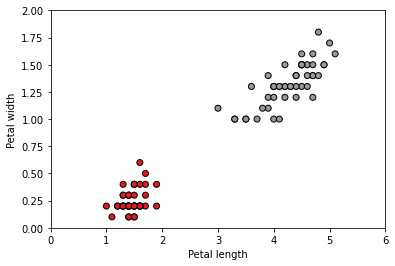

In [2]:
X = X_base[:100]
y = y_base[:100]

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.xlim(0, 6)
plt.ylim(0, 2)

## 5

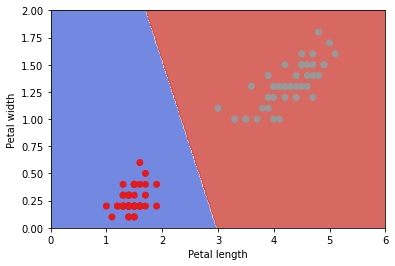

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1).fit(X, y)

# création du cadre dans lequel on va représenter le graphique
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(0, 6)
plt.ylim(0, 2)
plt.show()

## 6

<font color='red'>Dans un espace de $p$-dimension, un hyperplan est un sous-espace de dimension $p+1$.</font>

<font color='lightbluereen'>Faux, car c'est un espace à $p-1$ dimensions.</font>

<font color='red'>Dans un espace de 3 dimensions, un hyperplan est simplement une droite.</font>

<font color='lightbluereen'>Faux, car c'est un plan à 2 dimensions.</font>

<font color='red'>Un hyperplan séparateur permet de classiffier les observations selon leur localisation par rapport  a l'hyperplan.</font>

<font color='lightbluereen'>Vrai, car l'hyperlan séparateur sépare les clusters entre eux.</font>

<font color='red'>Dans un espace de 2 dimensions, il existe toujours au moins un hyperplan séparateur.</font>

<font color='lightbluereen'>Faux, car la disposition des données peut l'en empêcher.</font>

<font color='red'>Dans un espace de 3 dimensions, il peut ne pas exister d'hyperplan séparateur.</font>

<font color='lightbluereen'>Vrai, dans le cas où les données sont distribuées totalement aléatoirement.</font>

<font color='red'>Si les données sont parfaitement séparables avec un hyperplan, alors il existe une infinité d'hyperplans séparateurs.</font>

<font color='lightbluereen'>Vrai, car ici il n'est pas question de "marge".</font>

<font color='red'>Si les données sont parfaitement séparables avec un hyperplan, alors il existe une infinité d'hyperplans séparateurs.</font>

<font color='lightbluereen'>Vrai, car ici il n'est pas question de "marge".</font>

# **2.2 Deux classes non séparables**

## 7

Text(0, 0.5, 'Petal width')

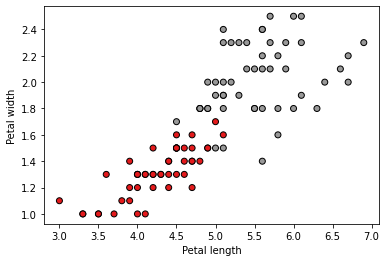

In [4]:
import matplotlib.pyplot as plt

X = X_base[50:]
y = y_base[50:]



plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width")

## 8

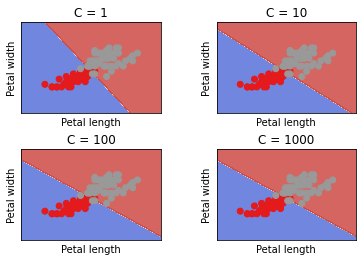

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

svc1 = svm.SVC(kernel='linear', C=1).fit(X, y)
svc2 = svm.SVC(kernel='linear', C=10).fit(X, y)
svc3 = svm.SVC(kernel='linear', C=100).fit(X, y)
svc4 = svm.SVC(kernel='linear', C=1000).fit(X, y)

# création du cadre dans lequel on va représenter le graphique
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

titles = ['C = 1',
          'C = 10',
          'C = 100',
          'C = 1000']

for i, clf in enumerate((svc1, svc2, svc3, svc4)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

## 9

<font color='red'>Dans le cadre d'un problème de classiffication, on peut toujours utiliser le maximal margin classiffier.</font>

<font color='lightbluereen'>Faux, car il faut qu'un hyperplan séparateur existe.</font>

<font color='red'>En présence d'un hyperplan séparateur, le maximal margin classifier produit toujours des meilleures performances que le soft margin classifier.</font>

<font color='lightbluereen'>Vrai, car le SMC est utilisé pour fitter des données en relachant l'hypothèse qu'il existe un hyperplan séparateur.</font>

<font color='red'>La différence principale entre le maximal margin classifer et le soft margin classifier repose sur la non-linéarité de l'hyperplan séparateur.</font>

<font color='lightbluereen'>Faux, car la différence principale est qu'avec le SMC, certaines données peuvent être dans la marge et/ou du mauvais côté (par exemple lorsqu'il n'y a pas d'hyperplan séparateur).</font>

<font color='red'>Le paramètre C détermine le nombre et le degré de violation de la marge.</font>

<font color='lightbluereen'>Vrai, car avec $C=0$, c'est un MMC, et plus $C$ augmente, plus on accepte de violations.</font>

<font color='red'>Le paramètre C est toujours compris entre 0 et 1.</font>

<font color='lightbluereen'>Faux, car $C \in \mathbb{R}_+$ (mais si $C$ est trop grand, le modèle souffre de biais).</font>

<font color='red'>Plus $C$ est grand, plus le biais sera faible sur la base d'apprentissage.</font>

<font color='lightbluereen'>Faux, car c'est l'inverse : le biais sera plus fort sur la base d'apprentissage.</font>

# **2.3 Trois classes**

## 10

Text(0, 0.5, 'Petal width')

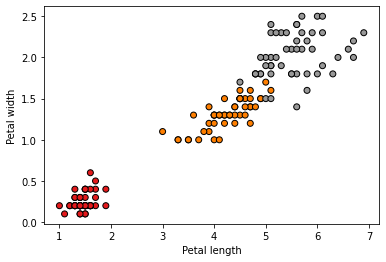

In [6]:
X = X_base
y = y_base

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width")

## 11

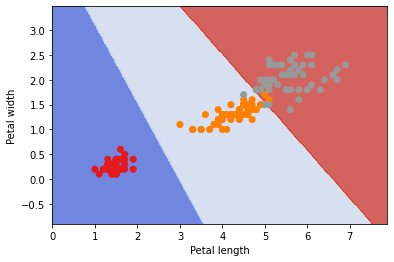

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

svc = svm.SVC(kernel='linear', C=1).fit(X, y)

# création du cadre dans lequel on va représenter le graphique
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

## 12

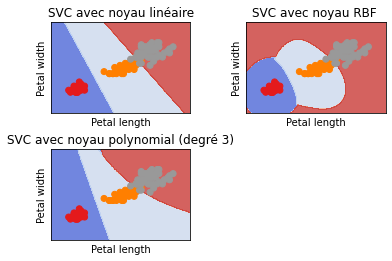

In [8]:
X = X_base
y = y_base


svc = svm.SVC(kernel='linear', C=1).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=1).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

titles = ['SVC avec noyau linéaire',
          'SVC avec noyau RBF ',
          'SVC avec noyau polynomial (degré 3)']


for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

<font color='red'>En général, l'astuce du noyau consiste à transposer les données dans un autre espace de plus petite dimension dans lequel elles sont linéairement séparables.</font>

<font color='lightbluereen'>Faux, car en général on transpose les données vers des dimensions supérieures.</font>

<font color='red'>L'intuition derrière l'astuce du noyau consiste à transposer un problème non-linéaire en problème linéaire.</font>

<font color='lightbluereen'>Vrai, car c'est pour cela que l'on utilise des polynômes, etc.</font>

<font color='red'>Dans le cadre des machines à vecteur de support, utiliser un noyau polynomial amène toujours les meilleures performances.</font>

<font color='lightbluereen'>Faux, car cela depend de la distribution des données. Il faudrait, dans ce cas, que la relation soit quadratique, par exemple.</font>

<font color='red'>Dans le cadre des machines à vecteur de support, utiliser un noyau gaussien amène toujours les meilleures performances.</font>

<font color='lightbluereen'>Faux, car cela depend de la distribution des données. Il faudrait, dans ce cas, que la distribution soit gaussienne, par exemple.</font>

<font color='red'>Si on souhaite déterminer le risque de crise cardiaque en fonction des caractéristiques
d'un individu, on peut utiliser une machine à vecteur de support.</font>

<font color='lightbluereen'>Vrai, car avec le SVM on peut un peu tout faire (classification et régression, mais surtout classification)</font>

<font color='red'>Les machines à vecteur de support peuvent constituer une alternative à la régression logistique.</font>

<font color='lightbluereen'>Vrai, car le SVM est meilleur quand les données sont non-linéaires.</font>

# **2.4 Comparaison de plusieurs modèles**

## 14

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=6)

## 15

In [10]:
list_C = [1,10,100,1000]
for i in list_C:
    svc = svm.SVC(kernel='linear', C=i).fit(X_train, y_train)
    print(f'% Classification Correct - Linéaire (Base Apprentissage) : {svc.score(X_train, y_train):.3f}')
    print(f'% Classification Correct - Linéaire (Base Test) : {svc.score(X_test, y_test):.3f}')

% Classification Correct - Linéaire (Base Apprentissage) : 0.961
% Classification Correct - Linéaire (Base Test) : 0.957
% Classification Correct - Linéaire (Base Apprentissage) : 0.969
% Classification Correct - Linéaire (Base Test) : 0.913
% Classification Correct - Linéaire (Base Apprentissage) : 0.969
% Classification Correct - Linéaire (Base Test) : 0.913
% Classification Correct - Linéaire (Base Apprentissage) : 0.969
% Classification Correct - Linéaire (Base Test) : 0.913


## 16

In [11]:
svc = svm.SVC(kernel='linear', C=10).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=10).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=10).fit(X_train, y_train)
print(f'% Classification Correct - Linéaire (Base Test) : {svc.score(X_test, y_test):.3f}')
print(f'% Classification Correct - RBF (Base Test) : {rbf_svc.score(X_test, y_test):.3f}')
print(f'% Classification Correct - Poly (Base Test) : {poly_svc.score(X_test, y_test):.3f}')

% Classification Correct - Linéaire (Base Test) : 0.913
% Classification Correct - RBF (Base Test) : 0.957
% Classification Correct - Poly (Base Test) : 0.913


## 17

<font color='red'>Quelle valeur de C choisiriez-vous ?</font>

<font color='lightbluereen'>10, car avec 10 la performance est la meilleur (et pas les autres C, par principe de parcimonie).</font>

<font color='red'>Quel noyau choisiriez-vous ?</font>

<font color='lightbluereen'>Le gaussien, car c'est avec lui que la performance est la meilleure.</font>

# **3 Réseaux de neuronnes**

## 18

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=6)

# **3.1 Couches cachées**

## 19

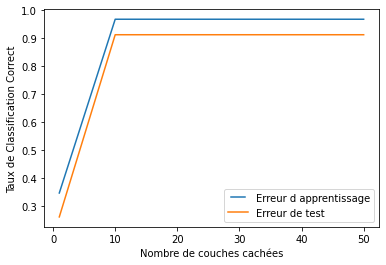

In [13]:
from sklearn.neural_network import MLPClassifier
n_couche = [1,10,20,50]
train_results = []
test_results = []
for i in n_couche:
   rf = MLPClassifier(hidden_layer_sizes=(i), solver = 'lbfgs', 
                      random_state=21,)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   test_r = rf.score(X_test,y_test)
   test_results.append(test_r)
   train_r = rf.score(X_train,y_train)
   train_results.append(train_r)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_couche, train_results, label='Erreur d apprentissage')
line2, = plt.plot(n_couche, test_results, label='Erreur de test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Taux de Classification Correct')
plt.xlabel('Nombre de couches cachées')
plt.show()

# **3.2 Fonction d'activation**

## 20

In [14]:
from sklearn.neural_network import MLPClassifier
f_activation = ['identity', 'logistic', 'tanh', 'relu']
train_results = []
test_results = []
for i in f_activation:
   rf = MLPClassifier(hidden_layer_sizes=(1), activation = i, solver = 'lbfgs', 
                      random_state=2)
   rf.fit(X_train, y_train)
   print(f'Test : {rf.score(X_test, y_test):.3f}')
   print(f'Train : {rf.score(X_train, y_train):.3f}')

Test : 0.913
Train : 0.969
Test : 0.913
Train : 0.969
Test : 0.913
Train : 0.969
Test : 0.261
Train : 0.346


# **3.3 Questions**

## 21

<font color='red'>Dans le cadre des réseaux de neurones, la performance du modèle augmente nécessairement avec le nombre de couches cachées.</font>

<font color='lightbluereen'>Vrai, mais l'apprentissage prendra plus de temps.</font>

<font color='red'>Dans le cadre des réseaux de neurones, la fonction d'activation logistique produit nécessairement des meilleures performances que la fonction linéaire.</font>

<font color='lightbluereen'>Cela dépend dépend de beaucoup de choses : le type de réseau, la linéarité dans les données, si l'on cherche une probabilité ou un quantitté etc. Pour des problèmes non-linéaires et un réseau RNN, par exemple, la logistique sera meilleur, oui. Mais on peut utiliser la fonction identité sur l'on fait une régression et que l'on cherche à prédire un réel.</font>

<font color='red'>Dans le cadre des réseaux de neurones, on initialise les poids aléatoirement.</font>

<font color='lightbluereen'>Vrai, car on ne les connaît pas à l'avance.</font>

<font color='red'>Dans le cadre des réseaux de neurones, on parle en général de deep learning quand le
nombre de couches cachées est inférieur à 3.</font>

<font color='lightbluereen'>Faux, car la dénomination "deep" n'est pas fixée. Certains parlent de deep learning à partir d'une couche, d'autres à partir de 10, cela dépend.</font>

<font color='red'>Dans le cadre des machines à vecteur de support, on parle en général de deep learning quand on utilise un noyau gaussien.</font>

<font color='lightbluereen'>Le deep learning, c'est faire des transformations non-linéaires à la chaîne. Le SVM gaussien n'en fait qu'une seule. Si l'on considère 1 transformation comme du deep learning alors oui, sinon non.</font>

<font color='red'>L'algorithme de rétro-propagation a trois composantes fondamentales : reverse pass, forward pass et step-wise pass.</font>

<font color='lightbluereen'>Faux, car il en possède 2 : forward et reverse pass.</font>